<a href="https://colab.research.google.com/github/theshauryas1/nasa-cmapss-pipeline/blob/main/nasacmapsspipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/theshauryas1/nasa-cmapss-pipeline.git
%cd nasa-cmapss-pipeline
# Install dependencies
!pip install -r requirements.txt -q
# Add to Python path
import sys
sys.path.insert(0, '/content/nasa-cmapss-pipeline')
print("✅ Project ready!")

Cloning into 'nasa-cmapss-pipeline'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 36 (delta 1), reused 36 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 53.60 KiB | 3.83 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/nasa-cmapss-pipeline
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-kernel-gateway 2.5.2 requires notebook<7.0,>=5.7.6, 

In [7]:
# Copy dataset from Drive to project
import shutil
import os
DRIVE_PATH = '/content/drive/MyDrive/CMaps/'  # Your actual path
os.makedirs('data/raw', exist_ok=True)
for filename in ['train_FD001.txt', 'test_FD001.txt', 'RUL_FD001.txt']:
    shutil.copy(f'{DRIVE_PATH}{filename}', f'data/raw/{filename}')
    print(f"✅ Copied {filename}")
print("\n✅ Dataset ready!")

✅ Copied train_FD001.txt
✅ Copied test_FD001.txt
✅ Copied RUL_FD001.txt

✅ Dataset ready!


In [8]:
import shutil
import os
DRIVE_PATH = '/content/drive/MyDrive/CMaps/'
os.makedirs('data/raw', exist_ok=True)
for filename in ['train_FD001.txt', 'test_FD001.txt', 'RUL_FD001.txt']:
    shutil.copy(f'{DRIVE_PATH}{filename}', f'data/raw/{filename}')
    print(f"✅ Copied {filename}")

✅ Copied train_FD001.txt
✅ Copied test_FD001.txt
✅ Copied RUL_FD001.txt


In [9]:
from src.data.ingestion import CMAPSSDataLoader, compute_training_rul
loader = CMAPSSDataLoader('data/raw')
train_df, test_df, rul_df = loader.load_dataset('FD001')
loader.print_summary(train_df, test_df, rul_df)

/content/nasa-cmapss-pipeline/src/data/ingestion.py:186: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/content/nasa-cmapss-pipeline/src/data/ingestion.py:186: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


NASA C-MAPSS Dataset Summary

📊 TRAINING DATA
  • Number of engines: 100
  • Total samples: 20,631
  • Lifecycle range: 128 - 362 cycles
  • Average lifecycle: 206.3 cycles

🧪 TEST DATA
  • Number of engines: 100
  • Total samples: 13,096
  • Observed cycles: 31 - 303

⏱️  REMAINING USEFUL LIFE (Ground Truth)
  • RUL range: 7 - 145 cycles
  • Mean RUL: 75.5 ± 41.8 cycles

🔧 FEATURES
  • Operational settings: 3
  • Sensor measurements: 21


/content/nasa-cmapss-pipeline/src/data/ingestion.py:160: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rul_df = pd.read_csv(


In [10]:
train_df = compute_training_rul(train_df, cap_rul=125)
# Preprocess
from src.data.preprocessing import DataPreprocessor, split_by_engine
preprocessor = DataPreprocessor(normalization='minmax', rolling_windows=[5, 10])
train_processed = preprocessor.fit_transform(train_df)
# Split for validation
train_split, val_split = split_by_engine(train_processed, test_size=0.2)
print(f"✅ Training: {len(train_split):,} samples")
print(f"✅ Validation: {len(val_split):,} samples")

/content/nasa-cmapss-pipeline/src/data/preprocessing.py:211: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_roll_range_{window}'] = roll_max - roll_min
/content/nasa-cmapss-pipeline/src/data/preprocessing.py:195: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_roll_mean_{window}'] = grouped.transform(
/content/nasa-cmapss-pipeline/src/data/preprocessing.py:200: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

✅ Training: 16,561 samples
✅ Validation: 4,070 samples


/content/nasa-cmapss-pipeline/src/data/preprocessing.py:211: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_roll_range_{window}'] = roll_max - roll_min


In [11]:
from src.models.baseline import LinearRULPredictor
from src.models.evaluation import print_evaluation_summary
# Prepare features
exclude_cols = ['engine_id', 'cycle', 'RUL', 'max_cycle', 'cycle_norm']
feature_cols = [c for c in train_processed.columns if c not in exclude_cols]
X_train = train_split[feature_cols]
y_train = train_split['RUL']
X_val = val_split[feature_cols]
y_val = val_split['RUL']
# Train
linear_model = LinearRULPredictor(regularization='ridge', alpha=1.0)
linear_model.fit(X_train, y_train)
# Evaluate
y_pred = linear_model.predict(X_val)
print_evaluation_summary(y_val.values, y_pred, 'Linear Regression')

EVALUATION SUMMARY: Linear Regression

📊 Overall Metrics (n=4,070):
  • RMSE: 18.95 cycles
  • MAE: 15.01 cycles
  • R²: 0.7936
  • MAPE: 31.4%
  • NASA Score: 25155.68

📈 Error Analysis by RUL Range:
rul_range  n_samples  mean_error      rmse       mae  pct_early  pct_late  mean_true_rul
     0-25        500    7.148297 13.976713 10.480030  31.800000 65.200000           12.0
    25-50        500   17.042137 21.522056 17.834017   9.000000 91.000000           37.0
    50-75        500   14.941105 20.109080 16.524606  14.000000 86.000000           62.0
   75-100        500    5.262092 16.125183 13.305553  36.000000 64.000000           87.0
  100-125        500  -10.499175 19.033763 14.930812  71.000000 29.000000          112.0
  125-200       1570  -11.307569 19.857351 15.642580  72.229299 27.770701          125.0

🎯 Prediction Bias:
  • Early predictions: 47.7%
  • Late predictions: 51.9%
  • Mean bias: -0.20 cycles


In [12]:
from src.models.neural_network import SimpleNeuralNetwork
nn_model = SimpleNeuralNetwork(input_dim=len(feature_cols), hidden_dims=[128, 64, 32])
nn_model.fit(X_train, y_train, epochs=50, verbose=True)
y_pred_nn = nn_model.predict(X_val)
print_evaluation_summary(y_val.values, y_pred_nn, 'Neural Network')

Epoch 10/50 - Train Loss: 516.1475 - Val Loss: 335.6600
Epoch 20/50 - Train Loss: 478.8031 - Val Loss: 307.8860
Epoch 30/50 - Train Loss: 451.6911 - Val Loss: 301.9128
Epoch 40/50 - Train Loss: 430.7639 - Val Loss: 300.0863
Epoch 50/50 - Train Loss: 405.3931 - Val Loss: 287.7328
EVALUATION SUMMARY: Neural Network

📊 Overall Metrics (n=4,070):
  • RMSE: 17.48 cycles
  • MAE: 12.70 cycles
  • R²: 0.8245
  • MAPE: 27.6%
  • NASA Score: 32761.88

📈 Error Analysis by RUL Range:
rul_range  n_samples  mean_error      rmse       mae  pct_early  pct_late  mean_true_rul
     0-25        500    1.568577  5.952141  4.541545  36.800000 63.200000           12.0
    25-50        500    4.062283 18.513058 13.592840  51.000000 49.000000           37.0
    50-75        500   11.492162 26.382765 21.615812  33.200000 66.800000           62.0
   75-100        500    7.785502 19.665971 16.376785  29.400000 70.600000           87.0
  100-125        500   -6.414081 17.666949 12.321982  62.600000 37.400000    

In [13]:
from src.models.neural_network import LSTMModel
# Get base sensor columns (no rolling features for LSTM)
base_cols = [c for c in feature_cols if 'roll' not in c and 'diff' not in c and 'ewm' not in c]
# Prepare sequences
X_seq_train, y_seq_train = LSTMModel.prepare_sequences(train_split, base_cols, 'RUL', sequence_length=30)
X_seq_val, y_seq_val = LSTMModel.prepare_sequences(val_split, base_cols, 'RUL', sequence_length=30)
# Train LSTM
lstm = LSTMModel(input_dim=len(base_cols), hidden_dim=64, num_layers=2)
lstm.fit(X_seq_train, y_seq_train, epochs=30, verbose=True)
# Evaluate
y_pred_lstm = lstm.predict(X_seq_val)
print_evaluation_summary(y_seq_val, y_pred_lstm, 'LSTM')

Epoch 10/30 - Train Loss: 1777.8886 - Val Loss: 1725.9263
Epoch 20/30 - Train Loss: 1771.7206 - Val Loss: 1715.3561
Epoch 30/30 - Train Loss: 1764.5255 - Val Loss: 1714.6569
EVALUATION SUMMARY: LSTM

📊 Overall Metrics (n=4,070):
  • RMSE: 41.72 cycles
  • MAE: 36.95 cycles
  • R²: -0.0001
  • MAPE: 230.2%
  • NASA Score: 1265035.70

📈 Error Analysis by RUL Range:
rul_range  n_samples  mean_error      rmse       mae  pct_early  pct_late  mean_true_rul
     0-25        500   74.788086 75.134931 74.788086        0.0     100.0           12.0
    25-50        500   49.788086 50.307589 49.788086        0.0     100.0           37.0
    50-75        500   24.788086 25.815679 24.788086        0.0     100.0           62.0
   75-100        500   -0.211914  7.214216  6.248477       52.0      48.0           87.0
  100-125        500  -25.211914 26.222903 25.211914      100.0       0.0          112.0
  125-200       1570  -38.211914 38.211913 38.211914      100.0       0.0          125.0

🎯 Predicti

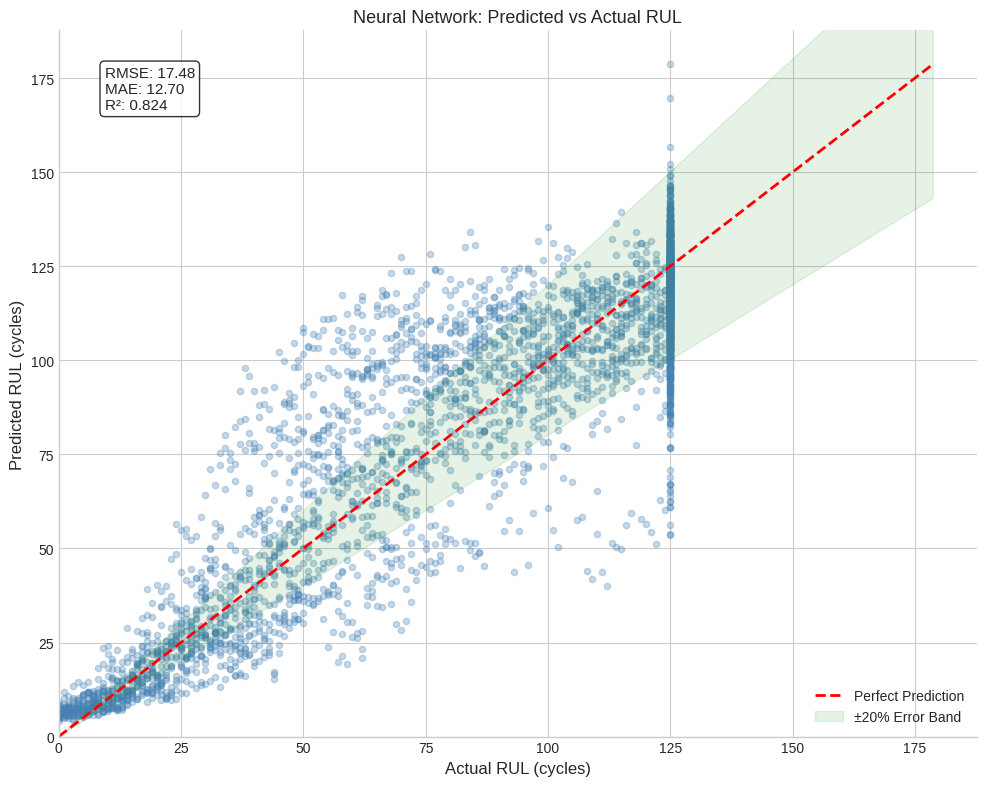

In [14]:
from src.visualization.plots import plot_prediction_vs_actual
plot_prediction_vs_actual(y_val.values, y_pred_nn, 'Neural Network')

In [15]:
from src.models.evaluation import compare_models
predictions = {
    'Linear': y_pred,
    'Neural Network': y_pred_nn,
}
comparison = compare_models(y_val.values, predictions)
print(comparison)

            model       rmse        mae        r2       mape    nasa_score
1  Neural Network  17.477519  12.700138  0.824466  27.597562  32761.881020
0          Linear  18.950911  15.011391  0.793623  31.445666  25155.684634


In [16]:
!git config --global user.email "theshauryash@gmail.com"
!git config --global user.name "theshauryas1"
# Save notebook first, then:
!cp /content/nasa-cmapss-pipeline/your_notebook.ipynb /content/nasa-cmapss-pipeline/notebooks/
%cd /content/nasa-cmapss-pipeline
!git add .
!git commit -m "Add Colab analysis notebook"
!git push

cp: cannot stat '/content/nasa-cmapss-pipeline/your_notebook.ipynb': No such file or directory
/content/nasa-cmapss-pipeline
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
